<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib

Ethen 2018-11-11 20:23:42 

CPython 3.6.4
IPython 6.4.0

numpy 1.14.1
pandas 0.23.0
sklearn 0.19.1
matplotlib 2.2.2


In [4]:
# https://www.kaggle.com/c/word2vec-nlp-tutorial#part-4-comparing-deep-and-non-deep-learning-methods
# http://www.pitt.edu/~naraehan/presentation/Movie+Reviews+sentiment+analysis+with+Scikit-Learn.html
# https://github.com/scikit-learn/scikit-learn/blob/master/doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
import os

data_dir = 'data'
data_path = os.path.join(data_dir, 'labeledTrainData.tsv')
df = pd.read_csv(data_path, sep='\t')
print('dimension: ', df.shape)
df.head()

dimension:  (25000, 3)


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [8]:
# split the dataset in training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.25, random_state=1234)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


# build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=5, max_df=0.9, stop_words='english')),
    ('logistic', LogisticRegression()),
])
tfidf_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

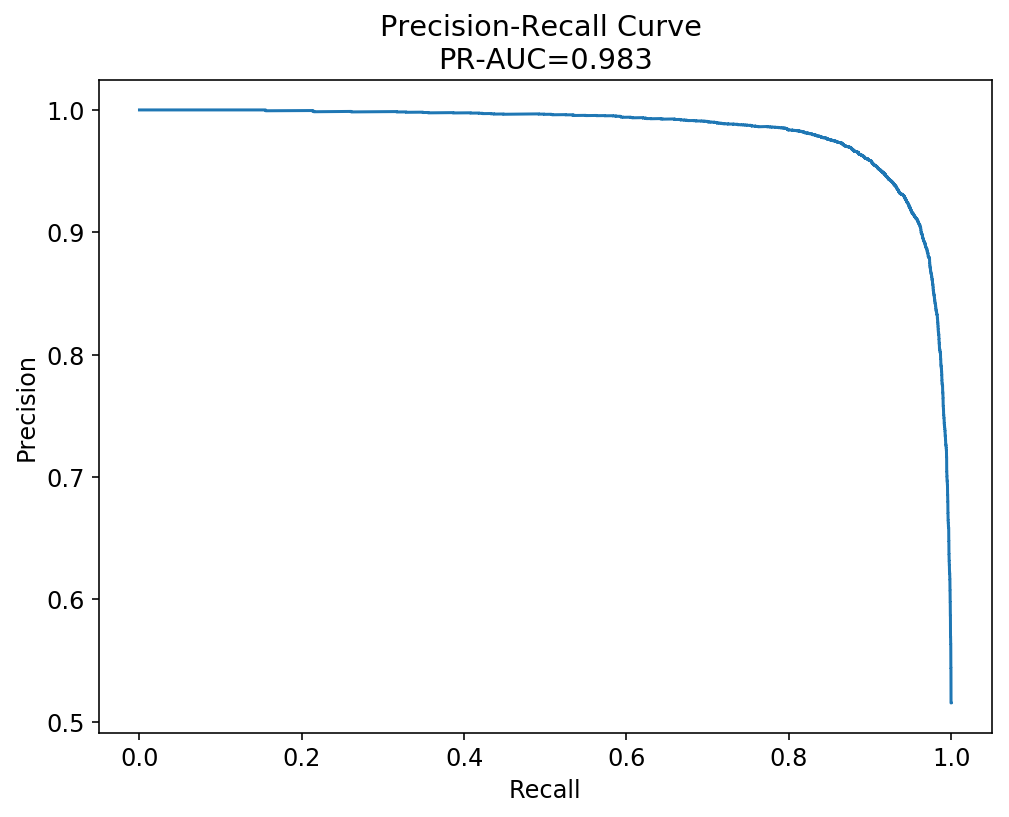

In [34]:
from sklearn.metrics import average_precision_score, precision_recall_curve

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

y_score = tfidf_pipeline.predict_proba(X_train)[:, 1]
average_precision = average_precision_score(y_train, y_score)
precision, recall, _ = precision_recall_curve(y_train, y_score)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve \nPR-AUC={0:0.3f}'.format(average_precision))
plt.show()

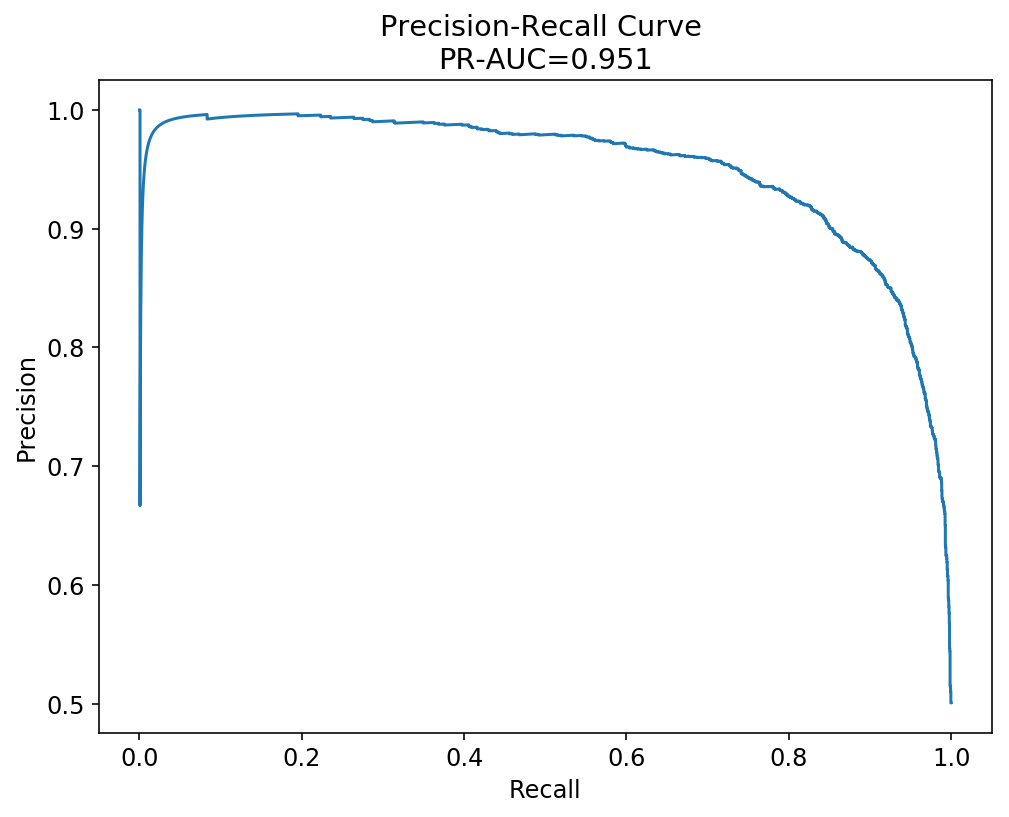

In [35]:
y_score = tfidf_pipeline.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve \nPR-AUC={0:0.3f}'.format(average_precision))
plt.show()

In [36]:
from bm25 import BM25Transformer
from sklearn.feature_extraction.text import CountVectorizer


# build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
bm25_pipeline = Pipeline([
    ('bow', CountVectorizer(min_df=5, max_df=0.95, stop_words='english')),
    ('bm25', BM25Transformer()),
    ('logistic', LogisticRegression()),
])
bm25_pipeline.fit(X_train, y_train)

/Users/mingyuliu/Desktop/learn_to_rank/bm25.py:49: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=5,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

/Users/mingyuliu/Desktop/learn_to_rank/bm25.py:49: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


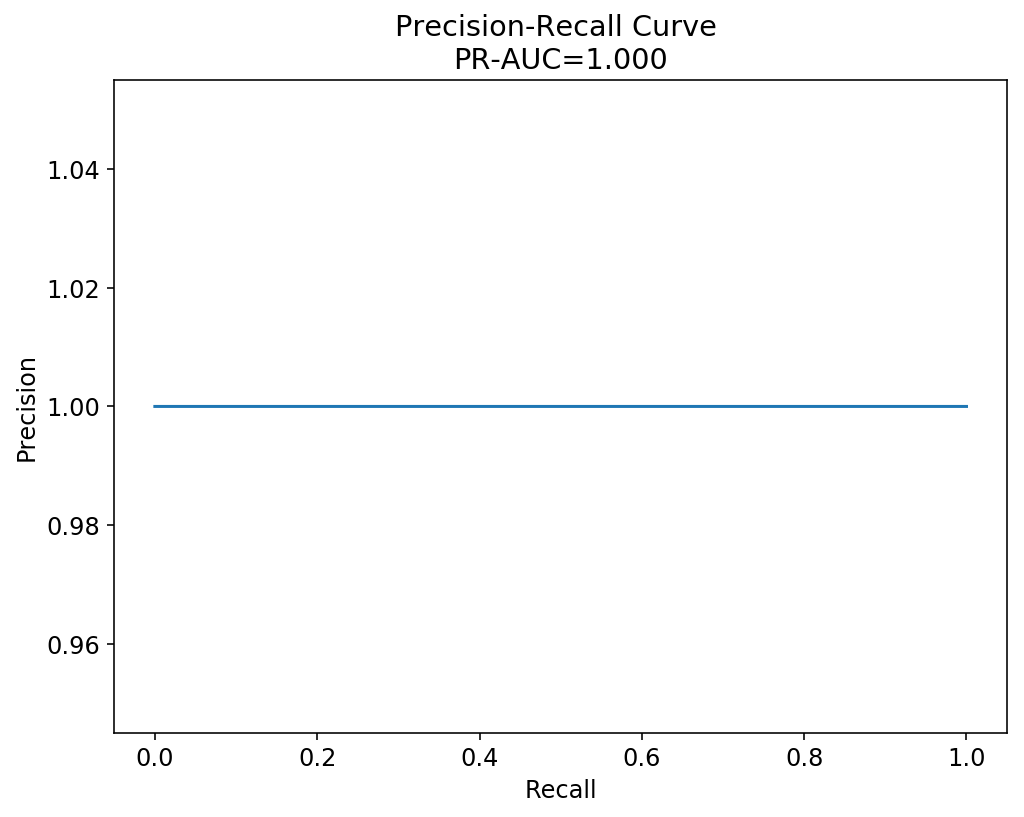

In [46]:
y_score = bm25_pipeline.predict_proba(X_train)[:, 1]
average_precision = average_precision_score(y_train, y_score)
precision, recall, _ = precision_recall_curve(y_train, y_score)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve \nPR-AUC={0:0.3f}'.format(average_precision))
plt.show()

In [47]:
recall

array([1.00000000e+00, 9.99893662e-01, 9.99787325e-01, ...,
       2.12675457e-04, 1.06337729e-04, 0.00000000e+00])

In [48]:
precision

array([1., 1., 1., ..., 1., 1., 1.])

In [49]:
y_score

array([9.96956616e-01, 3.63573368e-08, 2.13923971e-04, ...,
       9.99221163e-01, 9.99733891e-01, 7.46363775e-04])

In [45]:
precision

array([0.51920174, 0.5191211 , 0.51920819, ..., 1.        , 1.        ,
       1.        ])

/Users/mingyuliu/Desktop/learn_to_rank/bm25.py:49: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


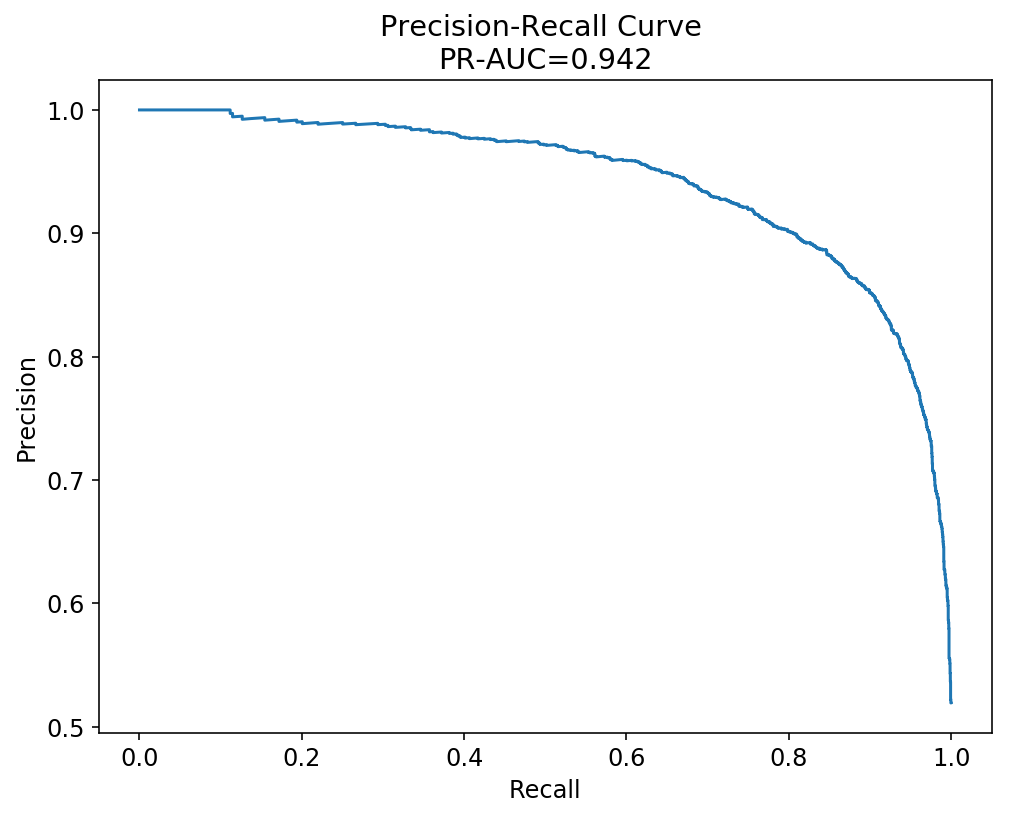

In [42]:
y_score = bm25_pipeline.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_score)
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve \nPR-AUC={0:0.3f}'.format(average_precision))
plt.show()

In [2]:
from gensim.summarization.bm25 import get_bm25_weights

corpus = [
    ["black", "cat", "white", "cat"],
    ["cat", "outer", "space"],
    ["wag", "dog"]

]
result = get_bm25_weights(corpus)
result

[[1.1237959024144617, 0.1824377227735681, 0],
 [0.11770175662810844, 1.1128701089187656, 0],
 [0, 0, 1.201942644155272]]